In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import sklearn.metrics
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC


# Random Forest


## Decision Tree

A Decision tree is a structure where internal node represent a test on an feature, each branch representing a test with this feature and each leaf has a class 

The algorithm will "learned" by subdividing the data depending on the value of the feature. This method is repeated recursively on each derived subset. When the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is finished.

## Bagging 

A bagging is an ensemble method that fits decision trees on random subsets of the original dataset, then aggregates their  predictions to generate a final prediction. It is used to reduce the variance of the estimator by introducing randomization into its building mechanism and then constructing an ensemble from it.

Bagging lowers overfitting (variance) by averaging or voting; nevertheless, this increases bias, which is offset by the decrease in variance.

## Random Forest

The aim of random forests is to reduce the variance between the scores of different classes by averaging a set of observations. The method is based on decision trees.

A decision tree is a decision-making tool that represents a set of choices in the graphical form of a tree. The leaves of such a tree represent the possible values, and the branches the combinations of input variables leading to that value.

The decision tree concept is that it aids in the selection of acceptable attributes for breaking the tree into subparts.

In the case of a classification problem, the majority voting classifier is used to determine the final output. The final output of a regression problem is the mean of all the outputs. Aggregation is the name of this section.

There are three main steps:

- Bootstrap: generates samples by random draw with discount;
- Bagging: training random decision trees from these samples on the training set;
- Prediction: applying the decision rules from the previous trees to a test set.

During prediction, the algorithm takes a majority vote, choosing the class predicted by the most trees.


## Advantages and Drawbacks

The advantages of this method are :
- speed,
- its ability to manage large databases,
- its ability to handle missing values.Even in the face of disruptions, especially when large sets of data go missing, random forests can still maintain good accuracy. 
- its ability to reduce overfitting by using multiple decision trees. They have much less variance when compared to a single decision tree.
- They are very flexible and deliver highly accurate results

Drawbacks
- Random Forests algorithms usually involve a lot of complexities. 
- Constructing Random forests usually requires much more time and effort than decision trees.
- They tend to be less intuitive especially when there is a large collection of decision trees involved. 
- Usually involves many computational resources for the implementation of the Random tree algorithm.



## Gini or Entropy for Random Forest

Firstly, for classification, there are two possible choices Gini or Entropy

The Entropy or the Gini are tree-splitting criterions. When your decision tree has to make a “split” in your data, it makes that split at that particular root node that minimizes the Entropy or Gini.

In this project due to the imbalanced data the Entropy is stronger in this particular situation compared to Gini. The logarithm with the Entropy will increase the "strengh" of small classes.

Having said this, Gini is usually less computationally expensive to calculate as it does not compute a logarithm. The Scikit-Learn implementation of RandomForestClassifier allows us to choose from both, so it might be worth trying both measures and seeing which leads to an smaller error.

Conclusion: fine tuning the split criteria could lead to different forests, and as there is only two possible values, we recommend trying them both for classification forests.

## Class weight 

!!!!!!!!! à rajouter !!!!!!!!!

## Tune Hyperparameters

This goal of this part is to prevent the model from underfitting or overfitting with different hyperparameters available with this model. Overfitting occurs when a model learns both the pattern and the noise of the data on which it is trained. In our case, an example would be fruit juices. In our database, most fruit juices are naturally orange juice. The model could initially take the word "juice" as a decision criterion for whether it's a fruit juice. But the model could overfits if it also takes the word "orange", since if a new product arrives and it's an apple juice, it will no longer categorize it as a fruit juice. The model, in particular, detects patterns that are distinctive to the observations in the training data but do not generalize to other observations. As a result, the model can make excellent predictions on the data it was trained on but cannot make effective predictions on data it did not encounter during training.

To reduce the overfitting we will also use cross validation during the hyperparameters selection.

### Random Forest Hyperparameters

Generally speaking, the random forest algorithm is not very sensitive to hyperparameters compared to other models, but it is still very important to play with certain parameters to improve results.

1. n_estimators
The hyperparameter n_estimator specifies the number of trees to be employed in the model. The sub-divisions are likewise represented by the tree. The total number of decision trees in the forest

2. max_features
The given dataset should have many features/variables to predict the label/target in order to train the Machine Learning model. Max_features restricts a count to select the most features from each tree. 

3. max_depth
Max_depth determines the maximum number of splits each tree can take. If the max_depth is too low, the model will be trained less and have a high bias, leading the model to underfit. In the same way, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit.

Max_leaf_nodes, Max_sample, Min_sample_split are other parameters that we won't consider here, because they are less important for our project


In [3]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv')
#df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop(labels=22426, axis=0)
df.head()

,Code_produit,Secteur,Famille,abricot,abricots,acidifiant,acidifiant acidifiant,acidifiant antioxydant,acidifiant arome,acidifiant arome naturel,...,vitamine pp,vitamine vitamine,vitamine vitamine b,vitamine vitamine vitamine,vitamines,vitamines vitamine,vitamines vitamine vitamine,volaille,yaourt,yaourt brass
0,450.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125377,0.0
1,453.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245026,0.0
2,455.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241945,0.0
3,456.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242882,0.0
4,460.0,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
y = df[["Secteur"]]
df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [4]:
y_train

,Secteur
35742,Produits traiteurs frais
21203,Chocolat et produits chocolates
32856,Fromages
52895,Cereales pour le petit dejeuner
16469,Biscuits et gateaux industriels
...,...
37194,Glaces et sorbets
6265,Panification croustillante et moelleuse
54886,Biscuits et gateaux industriels
860,Produits laitiers et desserts frais


### Nº of Trees in the forest:

By building forests with a large number of trees (high number of estimators) we can create a more robust aggregate model with less variance, at the cost of a greater training time. Most times the secret here is to evaluate your data: how much data is available, and how many features does each observation have.

Because of the randomness of Random Forest, if you have a lot of features and a small number of trees some features with high predictive power could get left out of the forest and not be used whatsoever, or be used very little.

The same applies for the data: if you have a lot of observations and you are not using the whole dataset to train each tree, if you have a small number of trees, then some observations could be left out.

As Random Forests rarely overfit, in practice you can use a large number of trees to avoid these problems, and get good results following the guideline that when all other hyper-parameters are fixed, increasing the number of trees generally reduces model error at the cost of a higher training time.

Don’t be fooled by this statement though, building a forest with 10K trees is a crazy and useless approach: the main takeaway is that as you increase the nº of trees you will be reducing model variance and generally model error would approximate an optimum value.

Conclusion: fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.

In [1]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
n_features=5
n_estimators=200
for i in range(1,n_estimators,20):
    forest=RFC(n_estimators=i, max_features=n_features, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(range(1,n_estimators,20), opt_table_estimators_accuracy)
plt.plot(range(1,n_estimators,20), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()


NameError: name 'RFC' is not defined

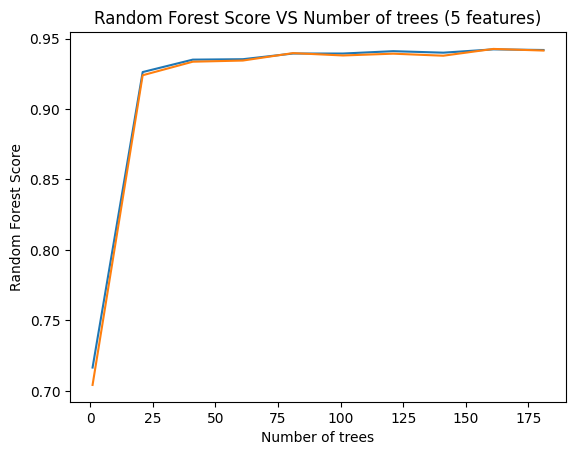

In [30]:
plt.plot(range(1,n_estimators,20), opt_table_estimators_accuracy)
plt.plot(range(1,n_estimators,20), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()


We can see that we can take a number of tree between 25 and 75 for the rest of the project to tune other hyperparameters

### The Maximum Depth of the Individual Trees :

Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account.

In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values.

This parameter should be set to a reasonable amount depending on the number of features of your tree: don’t build stumps (really shallow trees) nor insanely big trees; set this parameter to a reasonable amount and tune it a little bit if you want, but changes around a reasonable value do not impact the performance of your forest greatly, so you don’t have to include it in a procedure like Grid Search if you don’t want.

Conclusion: fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.


C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3821234801.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3821234801.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3821234801.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3821234801.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

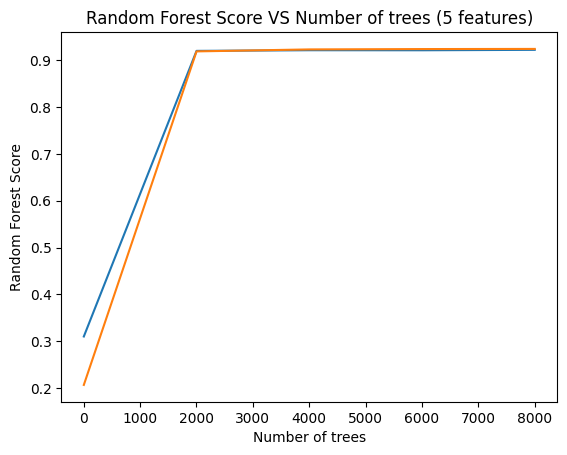

In [41]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
max_depth = 10000
n_estimators = 15
for i in range(1,max_depth,2000):
    forest=RFC(max_depth=i, n_estimators=n_estimators, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(range(1,max_depth,2000), opt_table_estimators_accuracy)
plt.plot(range(1,max_depth,2000), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [43]:
opt_table_estimators_f1

[0.20682171677271494,
 0.9185848809640583,
 0.9227821930687264,
 0.9235334227246809,
 0.9238471787567949]

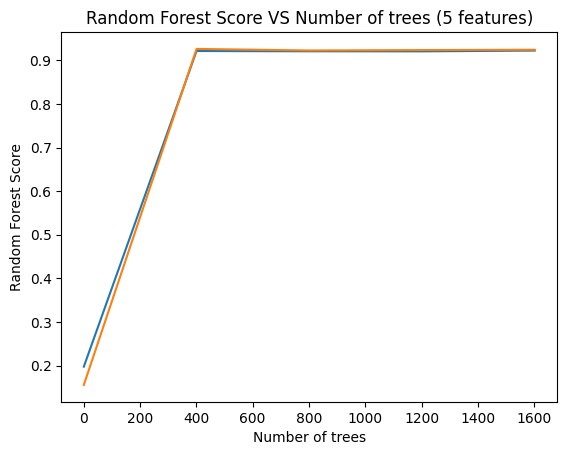

In [39]:
plt.plot(range(1,max_depth,400), opt_table_estimators_accuracy)
plt.plot(range(1,max_depth,400), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

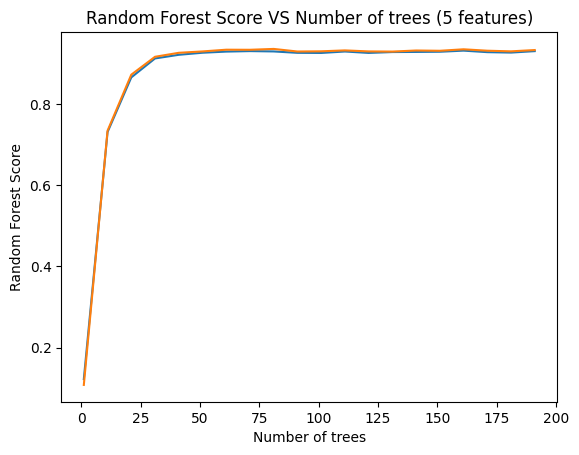

In [32]:
plt.plot(range(1,max_depth,10), opt_table_estimators_accuracy)
plt.plot(range(1,max_depth,10), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

max depth between 25 and 60

max_depth = 50

In [44]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
n_features=5000
max_depth =50
n_estimators = 40
for i in range(1,n_features,1000):
    forest=RFC(max_depth=max_depth, n_estimators=n_estimators, max_features = i, criterion = 'entropy', class_weight = "balanced")
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(range(1,n_features,10), opt_table_estimators_accuracy)
plt.plot(range(1,n_features,10), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3227604014.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_26708\3227604014.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


## Automatisation

Grid Search CV 

In [37]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'criterion' : ['entropy'],
    'class_weight' : ['balanced'],
    'max_depth': [25, 45, 60],
    'max_features': [20, 40],
    'n_estimators': [25, 50, 75]
}# Create a based model
rf = RFC()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 40,
 'n_estimators': 75}

In [5]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'criterion' : ['entropy'],
    'class_weight' : ['balanced'],
    'max_depth': [60],
    'max_features': [40],
    'n_estimators': [75]
}# Create a based model
rf = RFC()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)
output=grid_search.predict(X_test)
metrics.accuracy_score(y_test, output)
metrics.f1_score(y_test, output, average='macro')
classification_report(y_test, output)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9418816765791177

## Interpretation and Conclusion

Rajouter confusion matrix !!!!!!!!!

In [ ]:
import numpy as np

importance = grid_search.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.001,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.iloc[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

In [ ]:
# Import `tree` module
from sklearn import tree

features = df.columns.values # The name of each column
classes = y_train.values # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in grid_search.estimators_:
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator)
    plt.show()

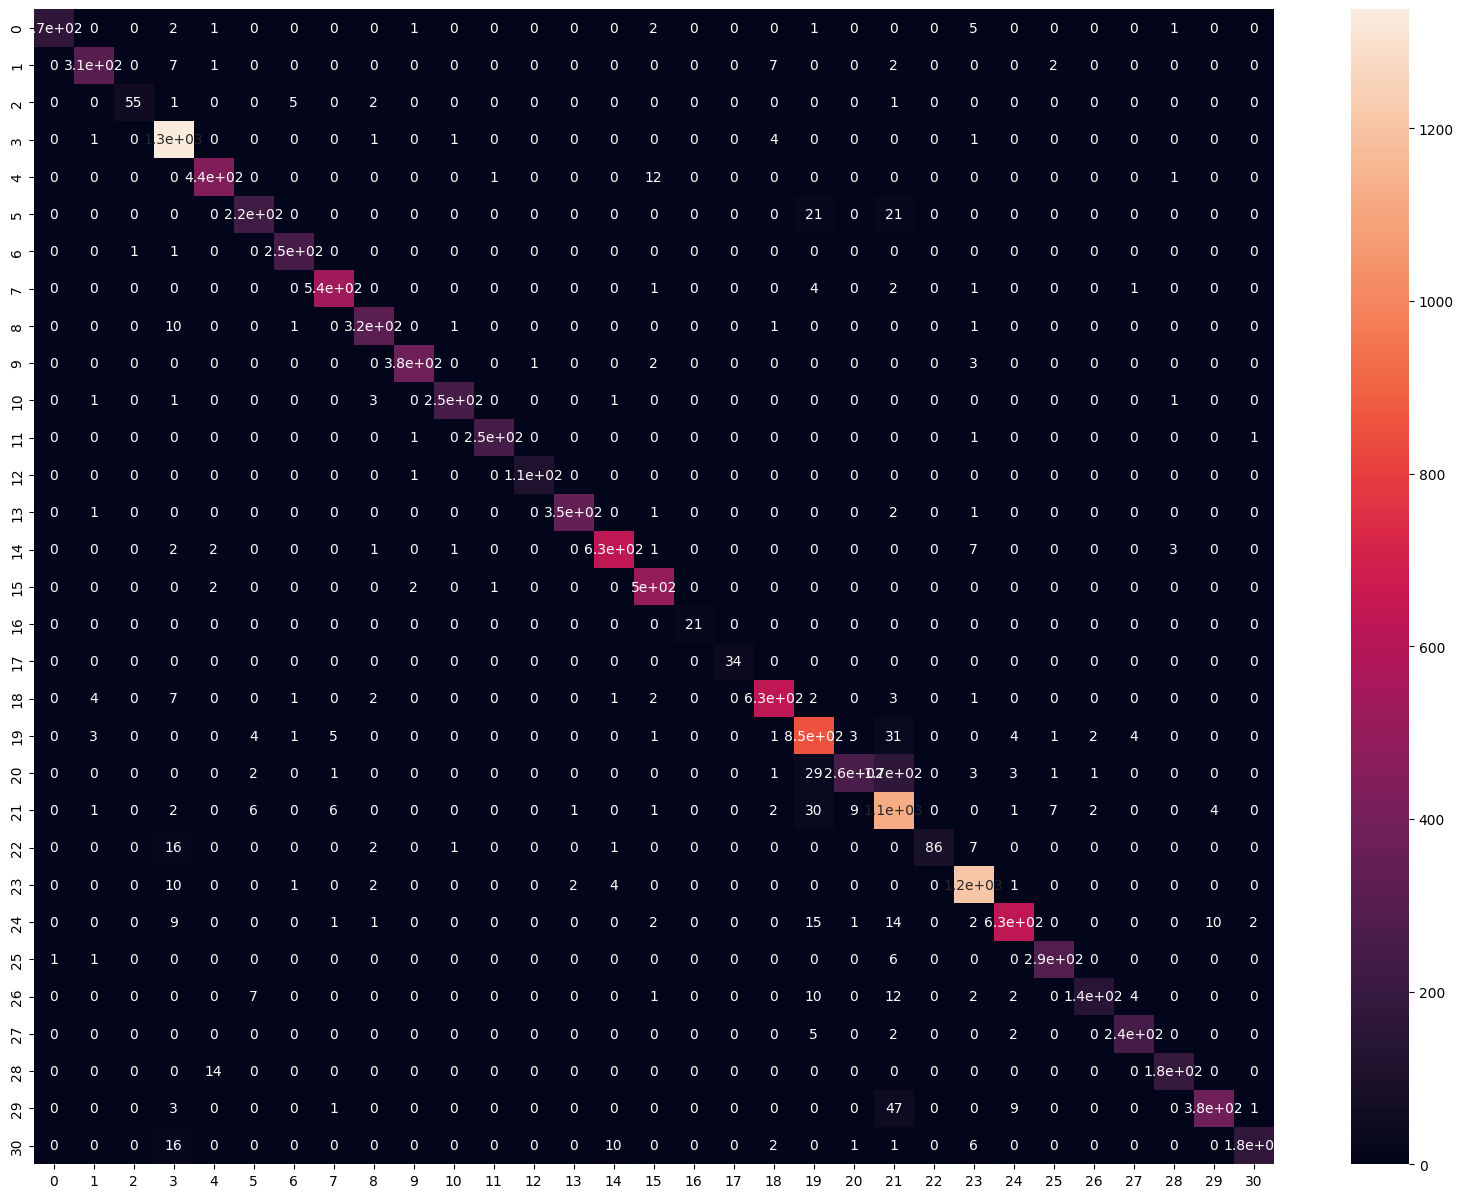

In [41]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, output)
#print(conf_mat)

# Visualize it as a heatmap
import seaborn
plt.subplots(figsize=(20,15))
seaborn.heatmap(conf_mat, annot=True)
plt.show()

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, output))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column
pd.DataFrame(confmtrx, index=pd.unique([item for sublist in y_test.values for item in sublist]), columns= pd.unique([item for sublist in y_test.values for item in sublist]))


,Compotes,Confiseries,Biscuits et gateaux industriels,Chocolat et produits chocolates,Produits traiteurs frais,Glaces et sorbets,Plats cuisines ambiants,Charcuterie,Sirops et boissons concentrees a diluer,Produits transformes a base de pomme de terre,...,Sauces chaudes,Viennoiseries et desserts surgeles,Conserves de fruits,Aliments infantiles de diversification,Sauces condimentaires,Barres cerealieres,Bouillons et potages,Margarines,Laits infantiles,Preparations pour desserts
Compotes,171,0,0,2,1,0,0,0,0,1,...,0,0,5,0,0,0,0,1,0,0
Confiseries,0,313,0,7,1,0,0,0,0,0,...,2,0,0,0,2,0,0,0,0,0
Biscuits et gateaux industriels,0,0,55,1,0,0,5,0,2,0,...,1,0,0,0,0,0,0,0,0,0
Chocolat et produits chocolates,0,1,0,1338,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Produits traiteurs frais,0,0,0,0,436,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Glaces et sorbets,0,0,0,0,0,225,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
Plats cuisines ambiants,0,0,1,1,0,0,253,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charcuterie,0,0,0,0,0,0,0,538,0,0,...,2,0,1,0,0,0,1,0,0,0
Sirops et boissons concentrees a diluer,0,0,0,10,0,0,1,0,318,0,...,0,0,1,0,0,0,0,0,0,0
Produits transformes a base de pomme de terre,0,0,0,0,0,0,0,0,0,381,...,0,0,3,0,0,0,0,0,0,0


In [22]:
index=pd.unique(y_test.values)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [26]:
y_test.values.unique

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [35]:
y_test.values

array([['Compotes'],
       ['Confiseries'],
       ['Biscuits et gateaux industriels'],
       ...,
       ['Glaces et sorbets'],
       ['Produits laitiers et desserts frais'],
       ['Plats cuisines ambiants']], dtype=object)

In [ ]:
unique_values = [list(y_test.values) for y_test.values in set(tuple(y_test.values) for x in aList)]

In [36]:
len(y_test.values)

13160

In [38]:
flat_list = [item for sublist in y_test.values for item in sublist]

In [39]:
flat_list

['Compotes',
 'Confiseries',
 'Biscuits et gateaux industriels',
 'Chocolat et produits chocolates',
 'Produits traiteurs frais',
 'Biscuits et gateaux industriels',
 'Glaces et sorbets',
 'Plats cuisines ambiants',
 'Charcuterie',
 'Biscuits et gateaux industriels',
 'Charcuterie',
 'Sirops et boissons concentrees a diluer',
 'Produits transformes a base de pomme de terre',
 'Plats cuisines ambiants',
 'Produits laitiers et desserts frais',
 'Produits laitiers et desserts frais',
 'Fromages',
 'Confiseries',
 'Charcuterie',
 'Boissons Rafraichissantes Sans Alcool',
 'Chocolat et produits chocolates',
 'Produits traiteurs frais',
 'Glaces et sorbets',
 'Jus et nectars',
 'Plats cuisines surgeles',
 'Biscuits et gateaux industriels',
 'Glaces et sorbets',
 'Plats cuisines surgeles',
 'Sirops et boissons concentrees a diluer',
 'Biscuits et gateaux industriels',
 'Produits traiteurs frais',
 'Plats cuisines surgeles',
 'Compotes',
 'Snacking surgele',
 'Boissons Rafraichissantes Sans Alc

In [37]:
pd.unique(pd.DataFrame(y_test.values))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)